# Hugging Face Tutorial

In [49]:
from collections import defaultdict, Counter
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import json

from matplotlib import pyplot as plt

import numpy as np
import torch

In [50]:
# autotokenizer automatically adapts to the fetched tokenizer
tokenizer = AutoTokenizer.from_pretrained('siebert/sentiment-roberta-large-english')
AutoModelForSequenceClassification.from_pretrained('siebert/sentiment-roberta-large-english')

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 1024, padding_idx=1)
      (position_embeddings): Embedding(514, 1024, padding_idx=1)
      (token_type_embeddings): Embedding(1, 1024)
      (LayerNorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-23): 24 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=True)
              (key): Linear(in_features=1024, out_features=1024, bias=True)
              (value): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=1024, out_features=1024, bias=True)
 

In [51]:
tokenizer

RobertaTokenizerFast(name_or_path='siebert/sentiment-roberta-large-english', vocab_size=50265, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'sep_token': '</s>', 'pad_token': '<pad>', 'cls_token': '<s>', 'mask_token': '<mask>'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	1: AddedToken("<pad>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	2: AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	3: AddedToken("<unk>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	50264: AddedToken("<mask>", rstrip=False, lstrip=True, single_word=False, normalized=False, special=True),
}

In [52]:
from transformers import DistilBertTokenizer, DistilBertTokenizerFast, AutoTokenizer
# The Fast one is written in Rust..

In [53]:
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-cased')

In [54]:
input_string = "Hugging Face Transformers is great"
tokenized_inputs = tokenizer(input_string)

tokenized_inputs

{'input_ids': [101, 20164, 10932, 10289, 25267, 1110, 1632, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1]}

In [55]:
print(tokenized_inputs.input_ids)
print(tokenized_inputs["input_ids"])

[101, 20164, 10932, 10289, 25267, 1110, 1632, 102]
[101, 20164, 10932, 10289, 25267, 1110, 1632, 102]


In [56]:
cls = [tokenizer.cls_token_id]
cls

[101]

In [57]:
sep = [tokenizer.sep_token_id]
sep

[102]

In [58]:
input_tokens = tokenizer.tokenize(input_string)
input_tokens

['Hu', '##gging', 'Face', 'Transformers', 'is', 'great']

In [59]:
input_ids = tokenizer.convert_tokens_to_ids(input_tokens)
input_ids

[20164, 10932, 10289, 25267, 1110, 1632]

In [60]:
input_ids_special_tokens = cls + input_ids + sep
input_ids_special_tokens

[101, 20164, 10932, 10289, 25267, 1110, 1632, 102]

In [61]:
decoded_str = tokenizer.decode(input_ids_special_tokens)
decoded_str

'[CLS] Hugging Face Transformers is great [SEP]'

#### NOTE: These steps don't generate attention masks or add special characters

In [62]:
# For fast tokenizers, there's another option too

inputs = tokenizer._tokenizer.encode(input_string)

print(f"Inputs: {inputs.tokens}")

Inputs: ['[CLS]', 'Hu', '##gging', 'Face', 'Transformers', 'is', 'great', '[SEP]']


In [63]:
model_inputs = tokenizer("Hugging Face Transformers is great!", return_tensors="pt")
model_inputs

{'input_ids': tensor([[  101, 20164, 10932, 10289, 25267,  1110,  1632,   106,   102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [64]:
model_inputs = tokenizer([
  "This is a very long text which I hope will be passed into the tokenizer etc",
  "This is a second string"
  ],
  return_tensors="pt",
  padding=True,
  truncation=True
  )
model_inputs

{'input_ids': tensor([[  101,  1188,  1110,   170,  1304,  1263,  3087,  1134,   146,  2810,
          1209,  1129,  2085,  1154,  1103, 22559, 17260,  3576,   102],
        [  101,  1188,  1110,   170,  1248,  5101,   102,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])}

In [65]:
tokenizer.pad_token

'[PAD]'

In [66]:
tokenizer.pad_token_id

0

In [67]:
tokenizer.batch_decode(model_inputs.input_ids)

['[CLS] This is a very long text which I hope will be passed into the tokenizer etc [SEP]',
 '[CLS] This is a second string [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]']

In [68]:
tokenizer.batch_decode(model_inputs.input_ids, skip_special_tokens=True)

['This is a very long text which I hope will be passed into the tokenizer etc',
 'This is a second string']

In [69]:
from transformers import DistilBertForSequenceClassification

In [70]:
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-cased', num_labels=16)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [71]:
model_inputs = tokenizer(input_string, return_tensors="pt")

model_outputs = model(input_ids=model_inputs.input_ids, attention_mask=model_inputs.attention_mask)

In [72]:
# The keys of the dict are the same as the keyword args the model expects:
# f({k1: v1, k2: v2}) = f(k1=v1, k2=v2)
model_outputs = model(**model_inputs)

In [73]:
classes = []
for a in ['i', 'e']:
  for b in ['n', 's']:
    for c in ['t', 'f']:
      for d in ['j', 'p']:
        pers = a+b+c+d
        classes.append(pers)
print('classes')

classes


In [74]:
labes = classes

In [75]:
from transformers import AutoModel
model = AutoModel.from_pretrained("distilbert-base-cased", 
                                  output_attentions=True, 
                                  output_hidden_states=True)
model.eval()

model_inputs = tokenizer(input_string, return_tensors="pt")

with torch.no_grad():
  model_output = model(**model_inputs)

print(model_outputs)


SequenceClassifierOutput(loss=None, logits=tensor([[-0.1059, -0.0290, -0.0966,  0.0024,  0.0133, -0.1409, -0.0191,  0.1269,
          0.0832, -0.2703,  0.0193,  0.0005, -0.0813, -0.0877,  0.0994, -0.0485]],
       grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)


In [76]:
model_output.hidden_states[0].shape

torch.Size([1, 8, 768])

In [77]:
model_output.attentions[0].shape

torch.Size([1, 12, 8, 8])

['[CLS]', 'Hu', '##gging', 'Face', 'Transformers', 'is', 'great', '[SEP]']


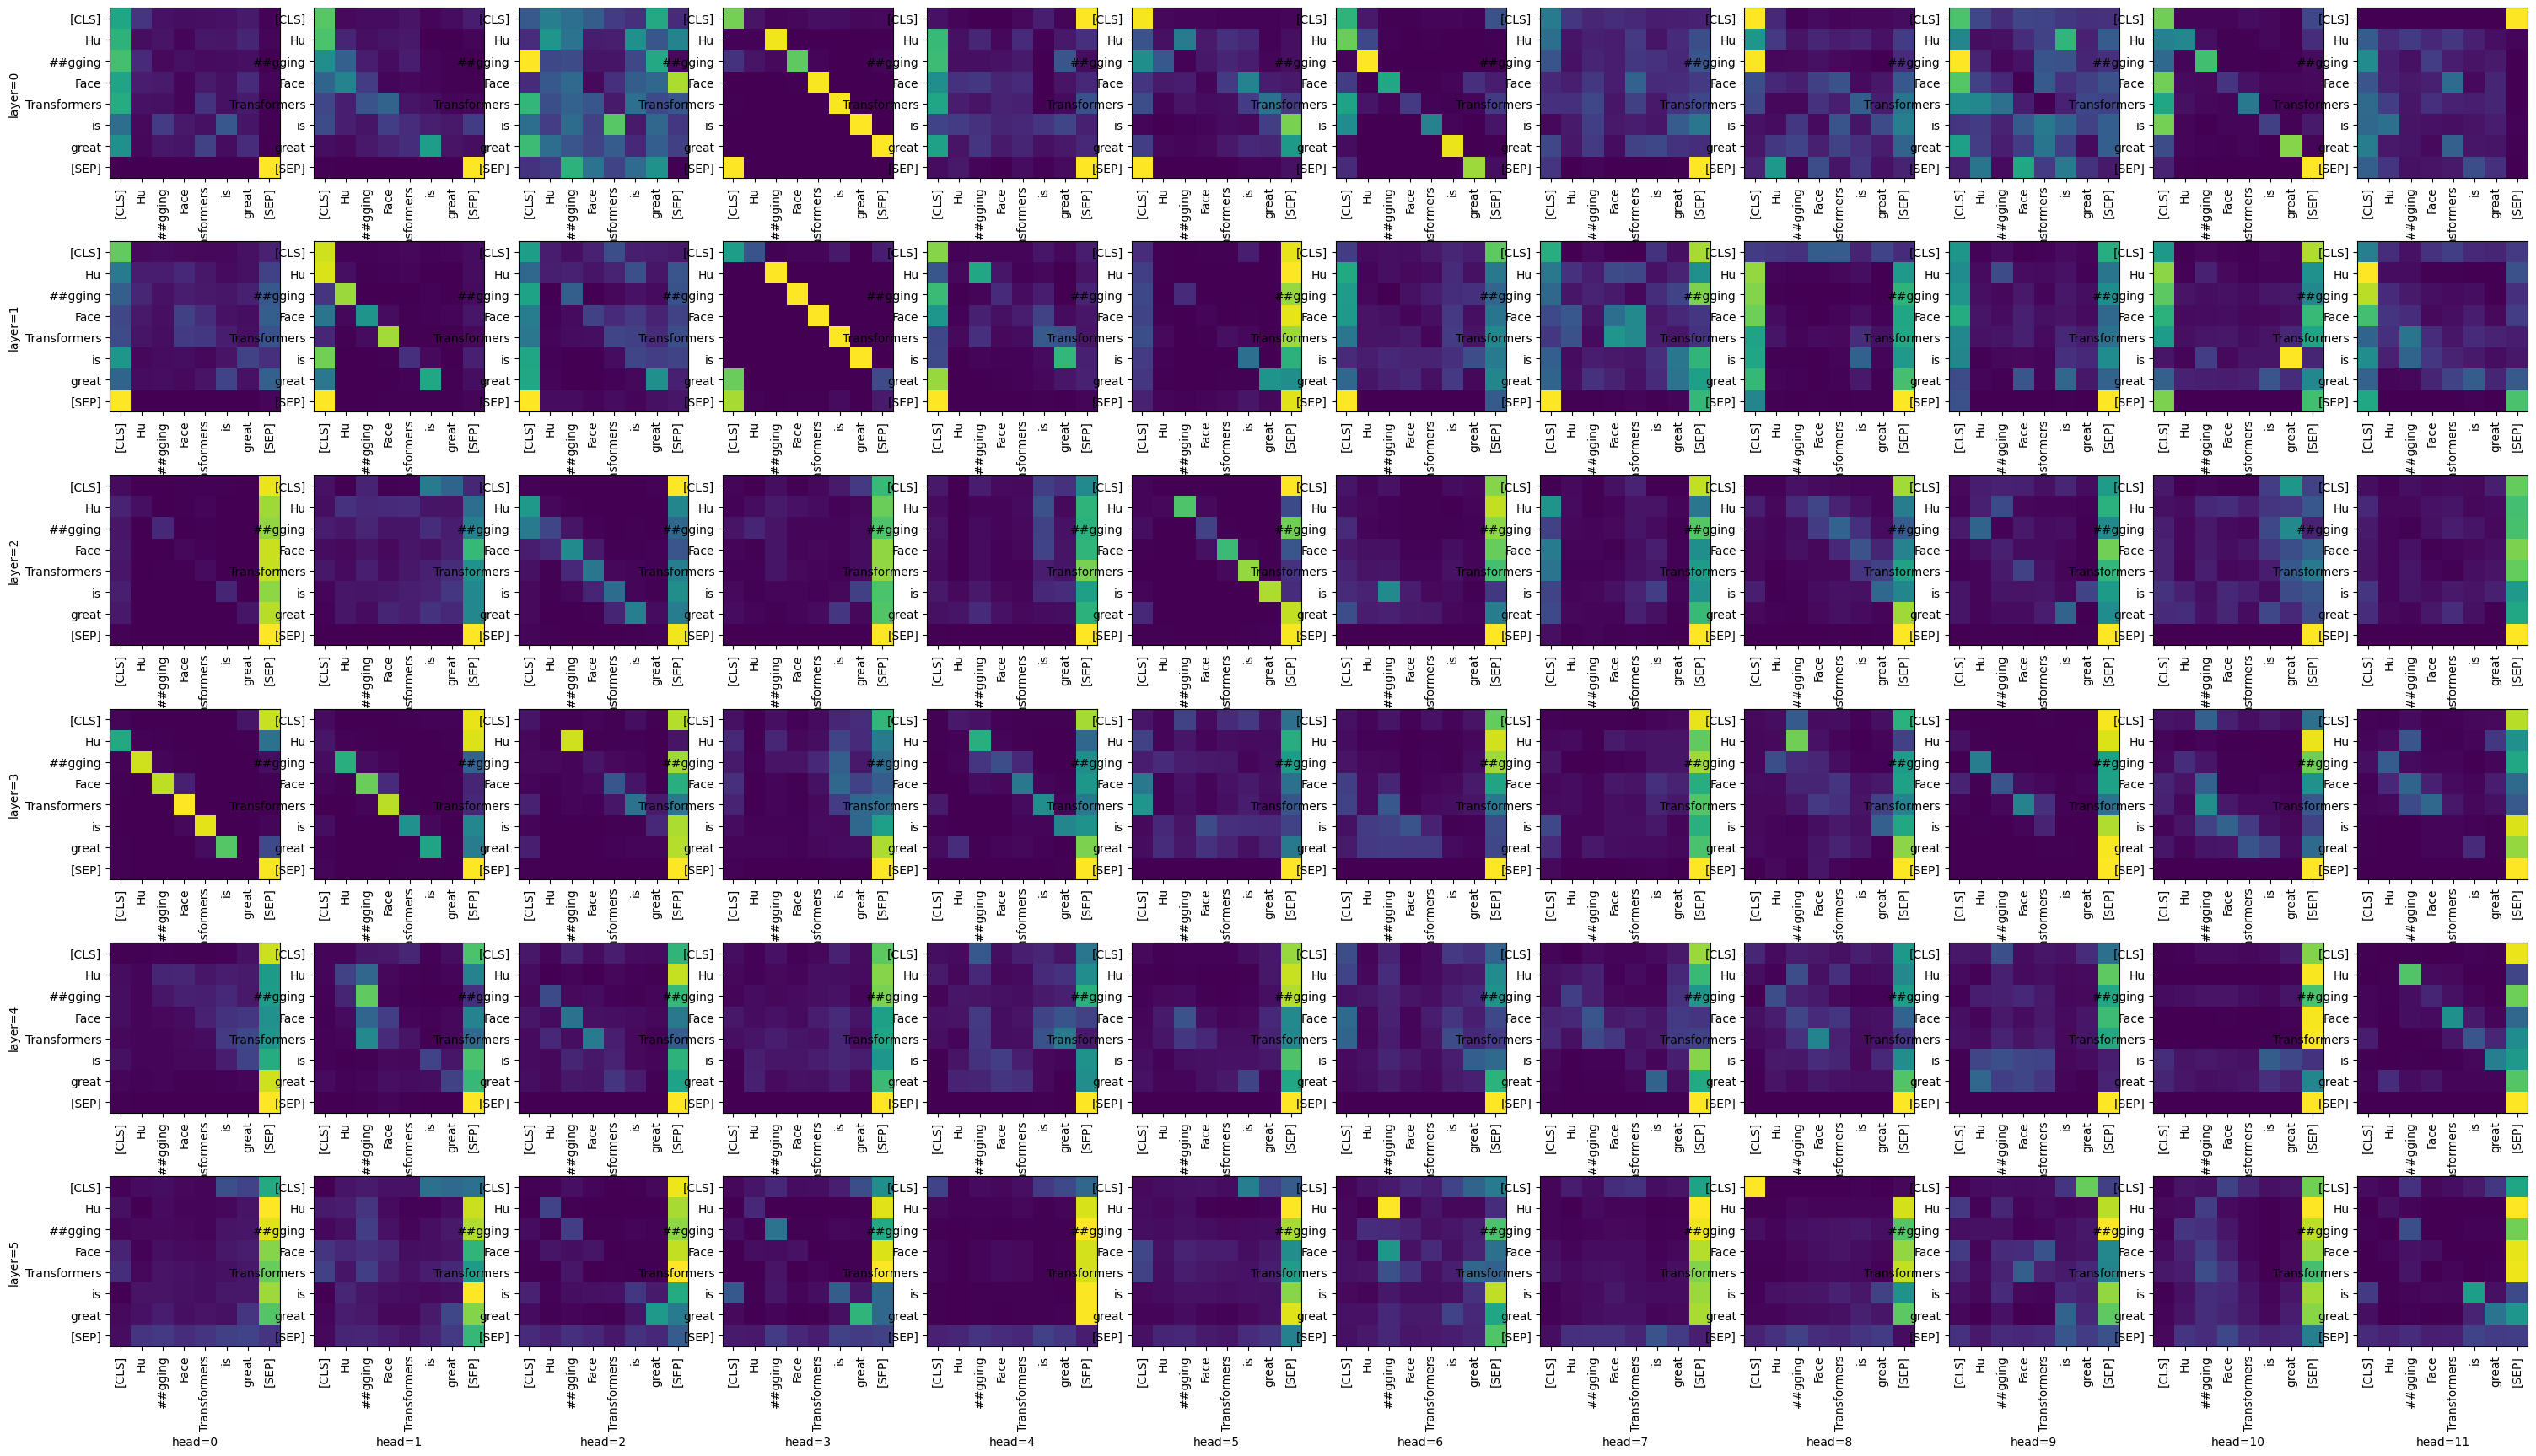

In [79]:
tokens = tokenizer.convert_ids_to_tokens(model_inputs.input_ids[0])

print(tokens)

n_layers = len(model_output.attentions)
n_heads = len(model_output.attentions[0][0])

fig, axes = plt.subplots(6, 12)
fig.set_size_inches(18.5*2, 10.5*2)

for layer in range(n_layers):
  for i in range(n_heads):
    axes[layer, i].imshow(model_output.attentions[layer][0,i])
    axes[layer][i].set_xticks(list(range(8)))
    axes[layer][i].set_xticklabels(labels=tokens, rotation="vertical")
    axes[layer][i].set_yticks(list(range(8)))
    axes[layer][i].set_yticklabels(labels=tokens)

    if layer == 5:
      axes[layer, i].set(xlabel=f"head={i}")

    if i == 0:
      axes[layer, i].set(ylabel=f"layer={layer}")